In [ ]:
#Lab | Cleaning categorical data
#For this lab, we will be using the dataset in the Customer Analysis Business Case. 
#This dataset can be found in files_for_lab folder. 
#In this lab we will explore categorical data. 
#You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

In [ ]:
#Instructions

#1. Import the necessary libraries if you are starting a new notebook.

#2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

#3. What should we do with the customer_id column?

#4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    #numerical_df = customer_df.select_dtypes()
    #categorical_df = customer_df.select_dtypes()
    
#5. Plot every categorical variable. What can you see in the plots? 
    #Note that in the previous lab you used a bar plot to plot categorical data, 
    #with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 
    #However, this time you will try a different plot. 
    #This time in each plot for the categorical variable you will have, 
    #each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
    
#6. For the categorical data, check if there is any data cleaning that need to perform.
    #Hint: You can use the function value_counts() on each of the categorical columns
    #and check the representation of different categories in each column. 
    #Discuss if this information might in some way be used for data cleaning.

### 1. Import the necessary libraries if you are starting a new notebook.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().


In [78]:
customer_df=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\Labs\we_fn_use_c_marketing_customer_value_analysis.csv')

In [79]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 3. What should we do with the customer_id column?

In [80]:
#Drop it, I consider it irrelevant to the rest of the data.
customer_df=customer_df.drop(columns=['Customer'])

### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
    #numerical_df = customer_df.select_dtypes()
    #categorical_df = customer_df.select_dtypes()

In [81]:
#Vemos tamano de la tabla
customer_df.shape

(9134, 23)

In [82]:
#Conocemos el tipo de variables con las que contamos
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [84]:
customer_df['Effective To Date']=pd.to_datetime(customer_df['Effective To Date'])

In [85]:
#Queremos asegurarnos de que los valores de la columna son realmente categoricos
customer_df['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [86]:
#Separamos data numerica de categorica
numerical_df = customer_df.select_dtypes(exclude=object)
categorical_df = customer_df.select_dtypes(include=object)

In [87]:
numerical_df

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,0,2,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,0,1,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,3,2,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,0,3,691.200000


In [88]:
categorical_df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 5. Plot every categorical variable. What can you see in the plots? 
    #Note that in the previous lab you used a bar plot to plot categorical data, 
    #with each unique category in the column on the x-axis and an appropriate measure on the y-axis. 
    #However, this time you will try a different plot. 
    #This time in each plot for the categorical variable you will have, 
    #each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

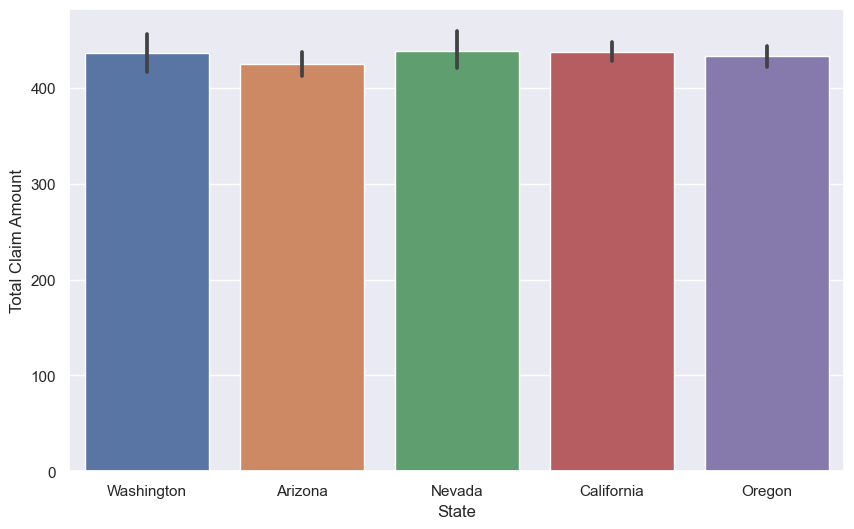

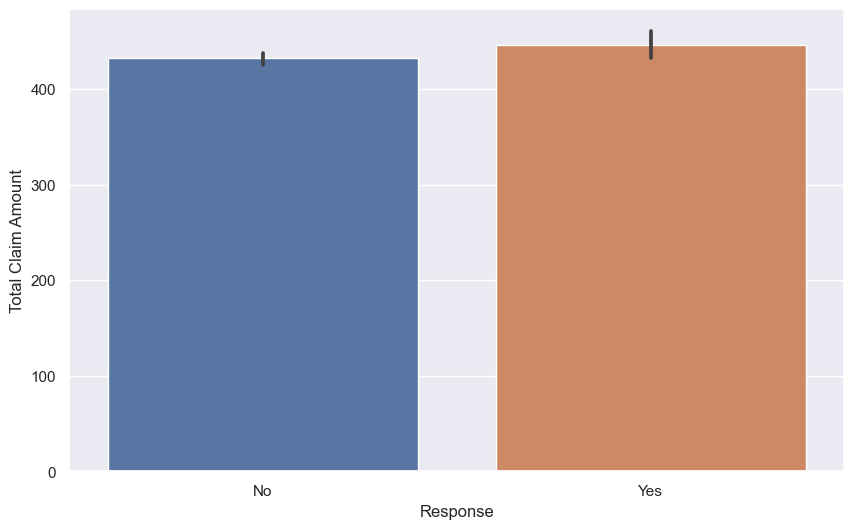

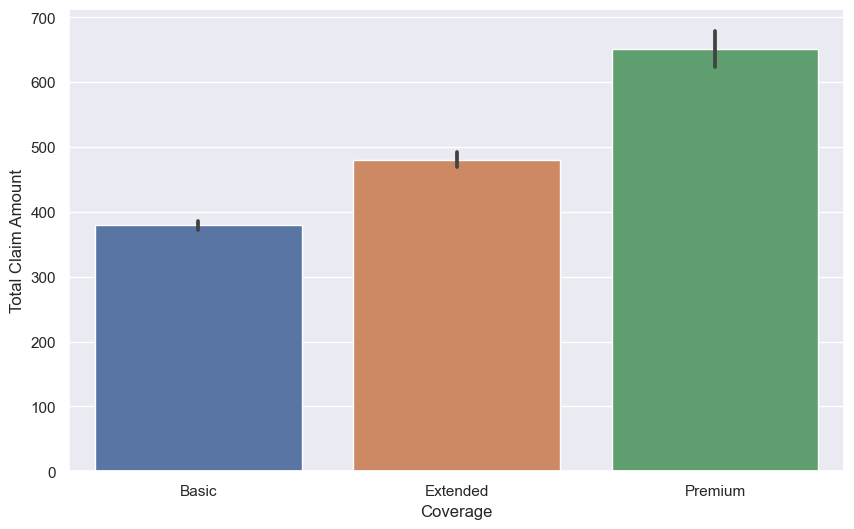

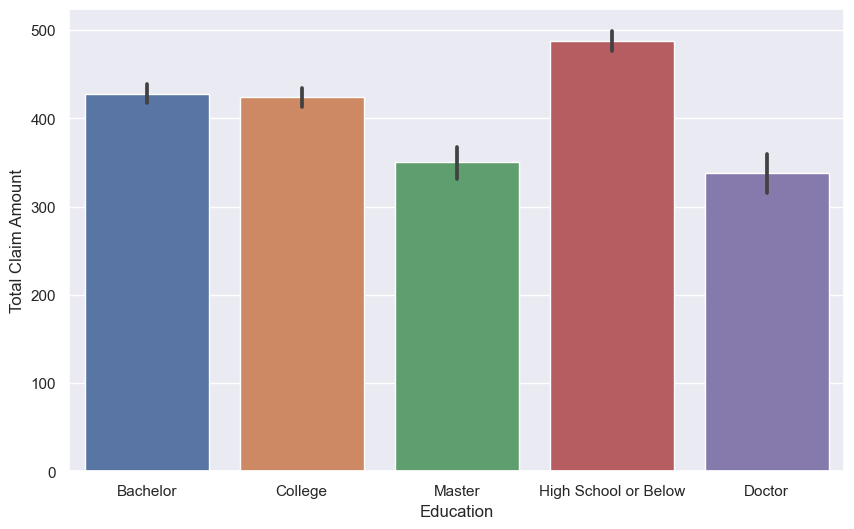

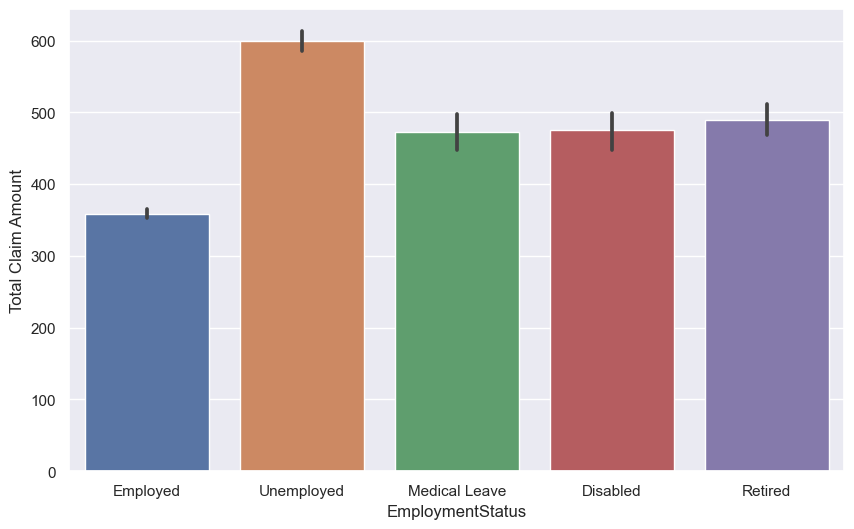

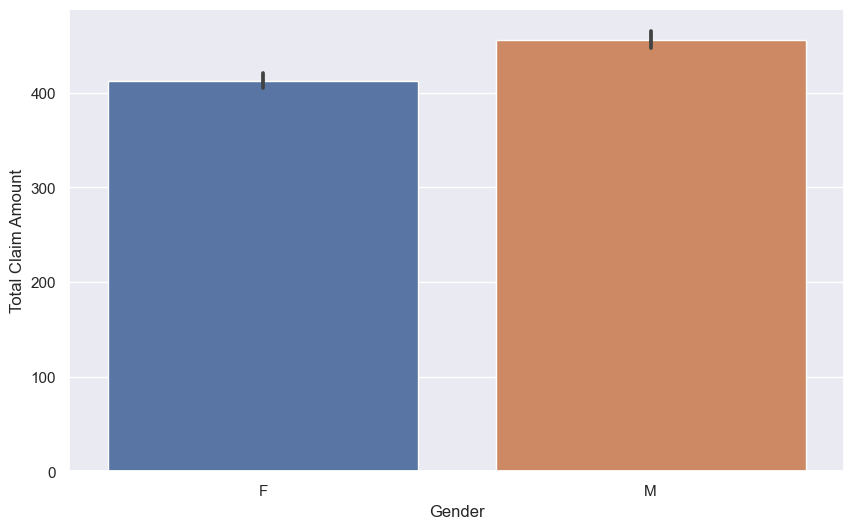

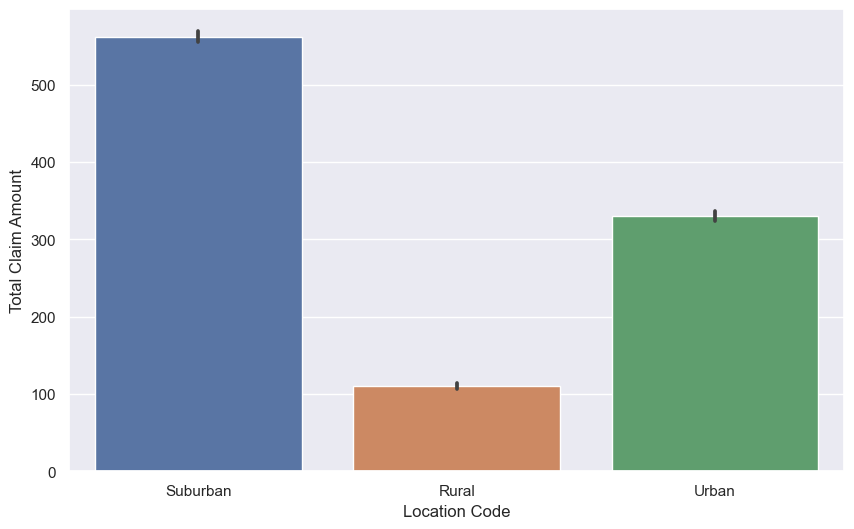

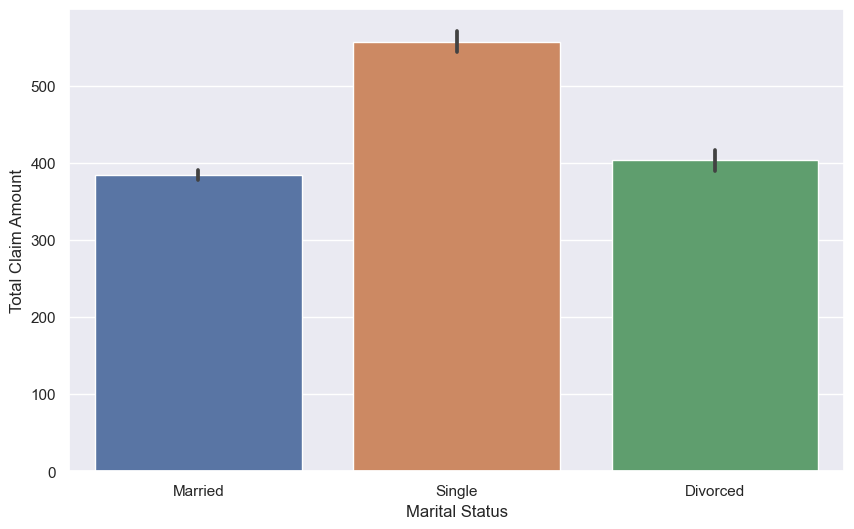

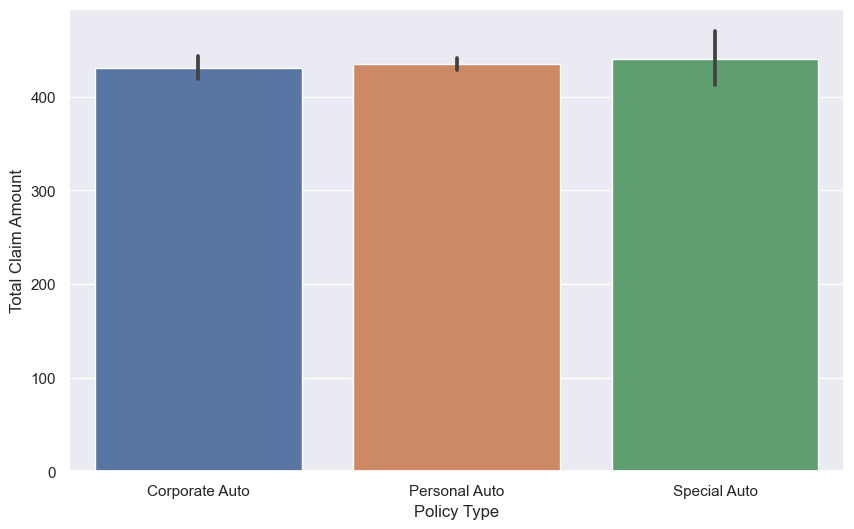

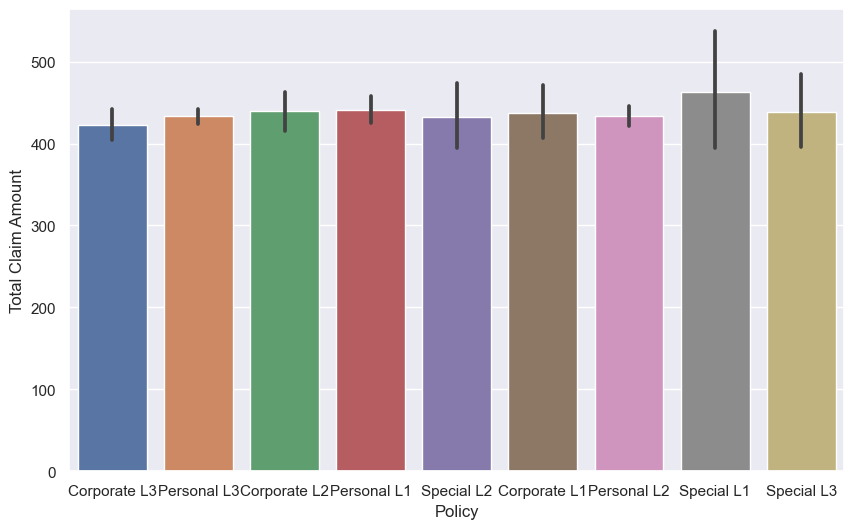

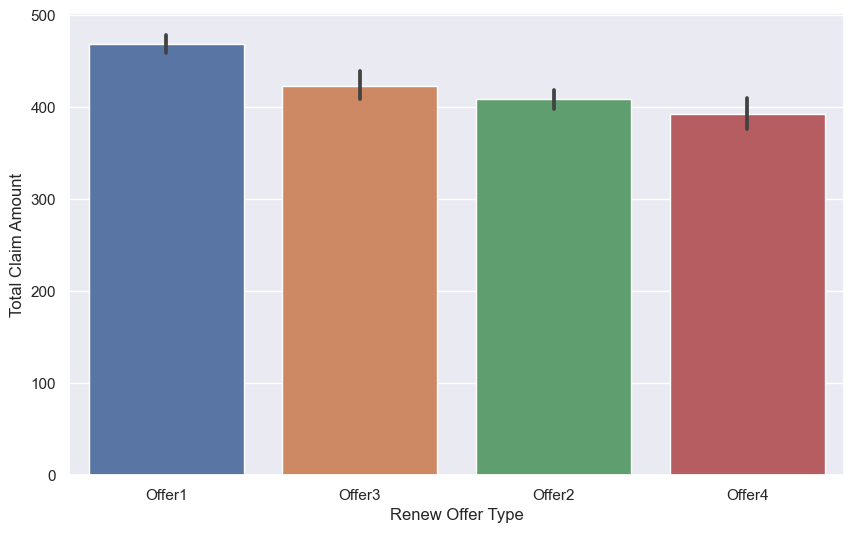

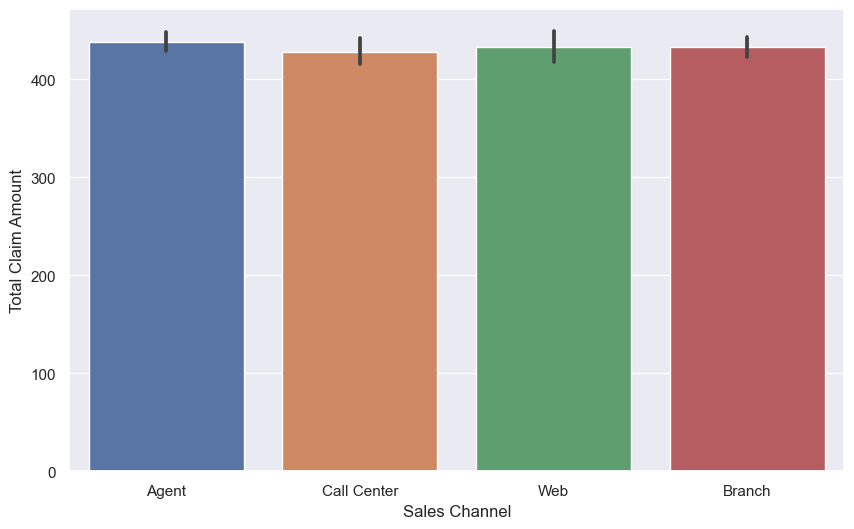

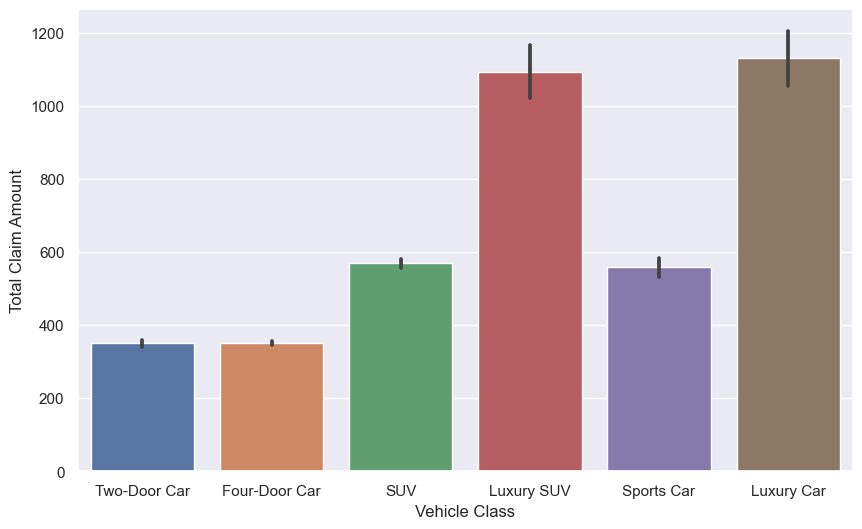

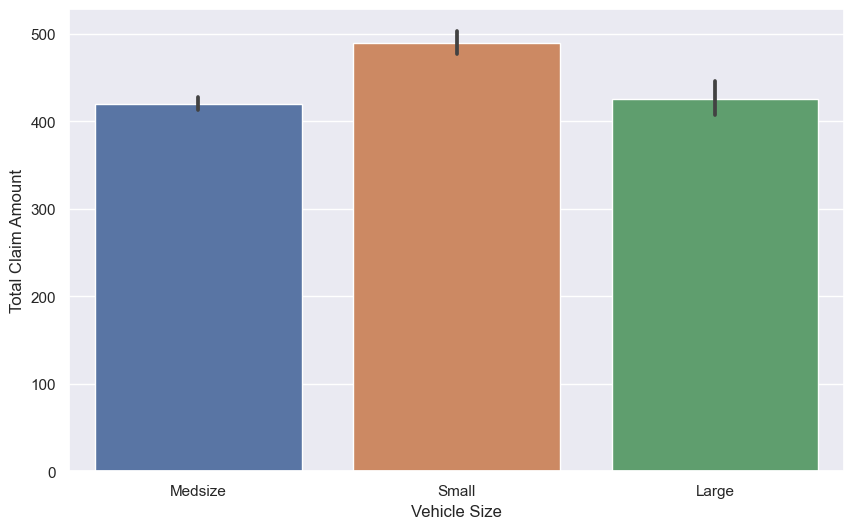

In [89]:
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical_df.columns:
    sns.barplot(x=categorical_df[i],y=numerical_df['Total Claim Amount'], data=customer_df)
    plt.show()

### 6. For the categorical data, check if there is any data cleaning that need to perform.
    #Hint: You can use the function value_counts() on each of the categorical columns
    #and check the representation of different categories in each column. 
    #Discuss if this information might in some way be used for data cleaning.

In [90]:
for i in categorical_df:
    categorical_df[i].value_counts()
    
    print(categorical_df[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
